### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


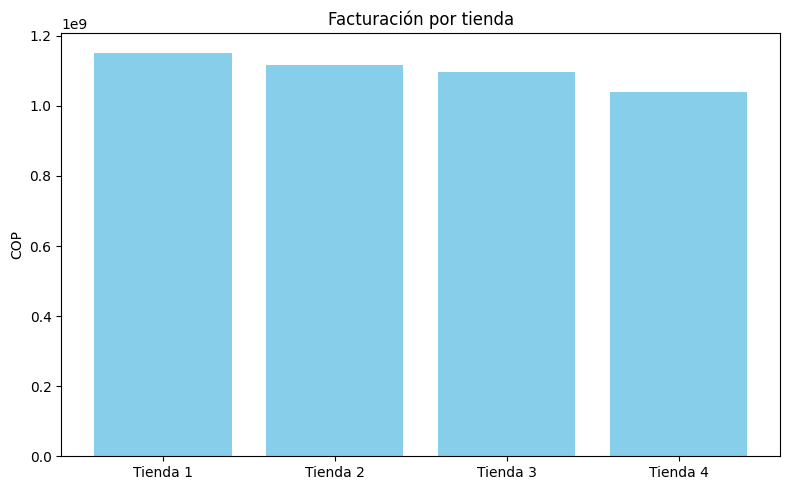

In [14]:
from urllib.request import urlopen
import csv
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url, url2, url3, url4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

total_facturacion = 0
facturaciones = []
tickets_promedio = []
ventas_por_tienda = []


for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0
    precios = []

    for venta in datos_tienda:
        precio = float(venta['Precio'])
        facturacion_tienda += precio
        precios.append(precio)

    facturaciones.append(facturacion_tienda)
    ventas_por_tienda.append(len(precios))
    tickets_promedio.append(sum(precios) / len(precios))

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:,.2f}")
    total_facturacion += facturacion_tienda


print(f"\nFacturación total de todas las tiendas: ${total_facturacion:,.2f}")


plt.figure(figsize=(8,5))
plt.bar([f"Tienda {i+1}" for i in range(len(urls))], facturaciones, color='skyblue')
plt.title("Facturación por tienda")
plt.ylabel("COP")
plt.tight_layout()
plt.show()



# 2. Ventas por categoría


Ventas por categoría - Tienda 1:
  Electrodomésticos: 254 ventas
  Muebles: 480 ventas
  Deportes y diversión: 277 ventas
  Libros: 187 ventas
  Electrónicos: 451 ventas
  Instrumentos musicales: 170 ventas
  Juguetes: 338 ventas
  Artículos para el hogar: 201 ventas


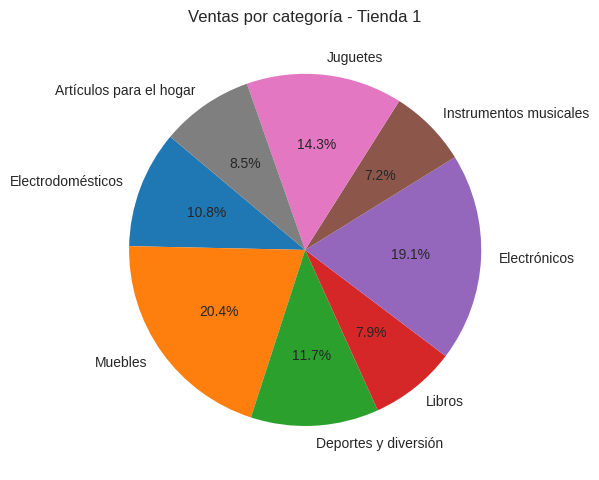


Ventas por categoría - Tienda 2:
  Muebles: 442 ventas
  Instrumentos musicales: 224 ventas
  Deportes y diversión: 275 ventas
  Electrónicos: 422 ventas
  Artículos para el hogar: 181 ventas
  Juguetes: 313 ventas
  Electrodomésticos: 305 ventas
  Libros: 197 ventas


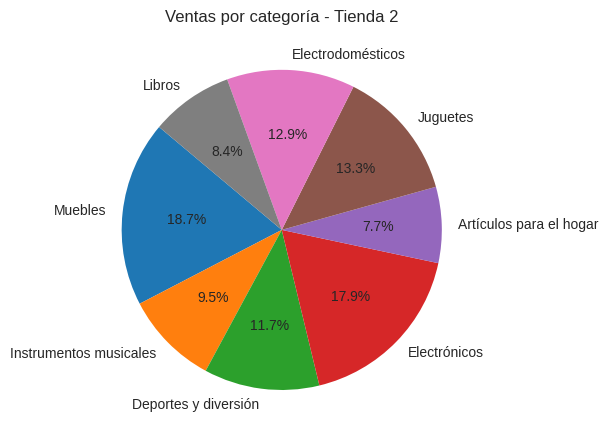


Ventas por categoría - Tienda 3:
  Electrodomésticos: 278 ventas
  Muebles: 499 ventas
  Instrumentos musicales: 177 ventas
  Deportes y diversión: 277 ventas
  Electrónicos: 451 ventas
  Juguetes: 315 ventas
  Artículos para el hogar: 177 ventas
  Libros: 185 ventas


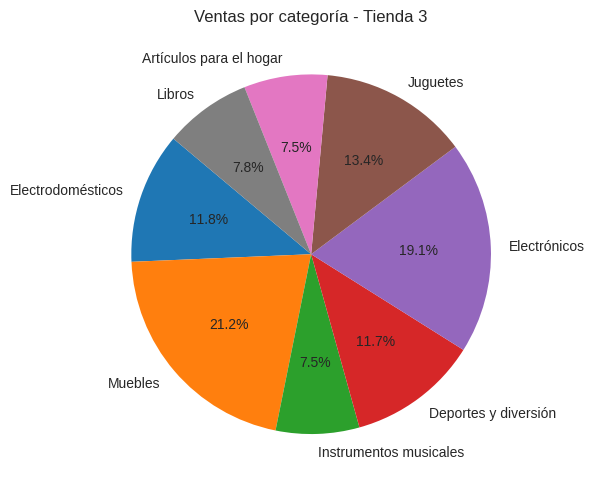


Ventas por categoría - Tienda 4:
  Electrodomésticos: 254 ventas
  Muebles: 480 ventas
  Deportes y diversión: 277 ventas
  Libros: 187 ventas
  Electrónicos: 451 ventas
  Instrumentos musicales: 170 ventas
  Juguetes: 338 ventas
  Artículos para el hogar: 201 ventas


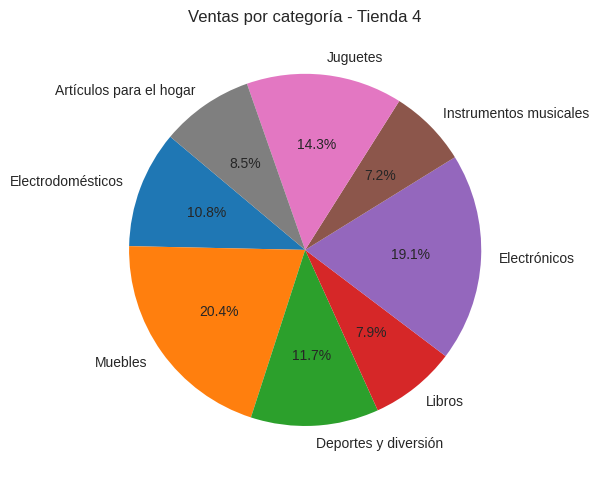

In [31]:
from collections import defaultdict
import matplotlib.pyplot as plt

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    ventas_categoria = defaultdict(int)

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto'].strip().capitalize()
        if categoria.lower() == "electronicos" or categoria.lower() == "electrónicos":
            categoria = "Electrónicos"
        ventas_categoria[categoria] += 1

    print(f"\nVentas por categoría - Tienda {i+1}:")
    for categoria, cantidad in ventas_categoria.items():
        print(f"  {categoria}: {cantidad} ventas")


    plt.figure(figsize=(6,6))
    plt.pie(
        ventas_categoria.values(),
        labels=ventas_categoria.keys(),
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"Ventas por categoría - Tienda {i+1}")
    plt.tight_layout()
    plt.show()



# 3. Calificación promedio de la tienda


Calificación promedio Tienda 1: 4.00
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


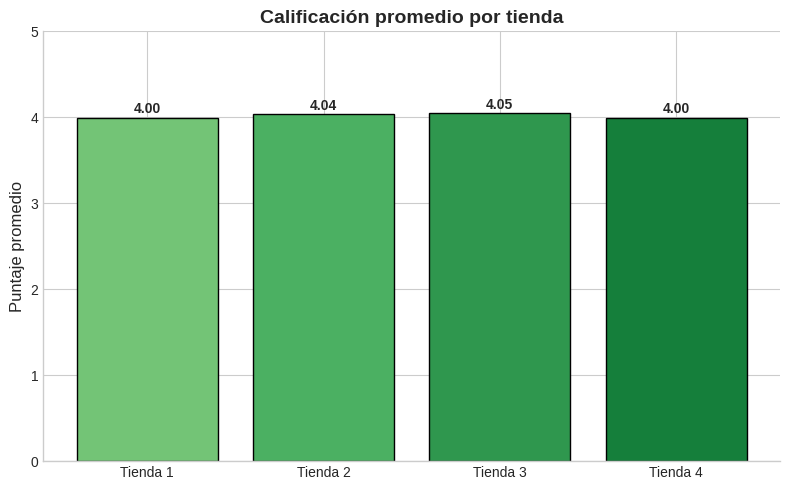

In [21]:
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

urls = [url, url2, url3, url4]

promedios_calif = []

for i, url in enumerate(urls):
    df = pd.read_csv(url)

    col_calif = [col for col in df.columns if 'calific' in col.lower()][0]
    promedio = df[col_calif].mean()
    promedios_calif.append(promedio)
    print(f"Calificación promedio Tienda {i+1}: {promedio:.2f}")

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))

barras = ax.bar(
    [f"Tienda {i+1}" for i in range(len(urls))],
    promedios_calif,
    color=plt.cm.Greens([0.5, 0.6, 0.7, 0.8]),
    edgecolor="black"
)

ax.set_title("Calificación promedio por tienda", fontsize=14, fontweight="bold")
ax.set_ylabel("Puntaje promedio", fontsize=12)
ax.set_ylim(0, 5)


for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.05,
        f"{altura:.2f}",
        ha="center",
        fontsize=10,
        fontweight="bold"
    )


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $96697500.00
  TV LED UHD 4K - Ingresos: $90295300.00
  Smart TV - Ingresos: $82790400.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Dinosaurio Rex - Ingresos: $858100.00
  Cubo mágico 8x8 - Ingresos: $748400.00
  Cuerda para saltar - Ingresos: $704800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex - Ingre

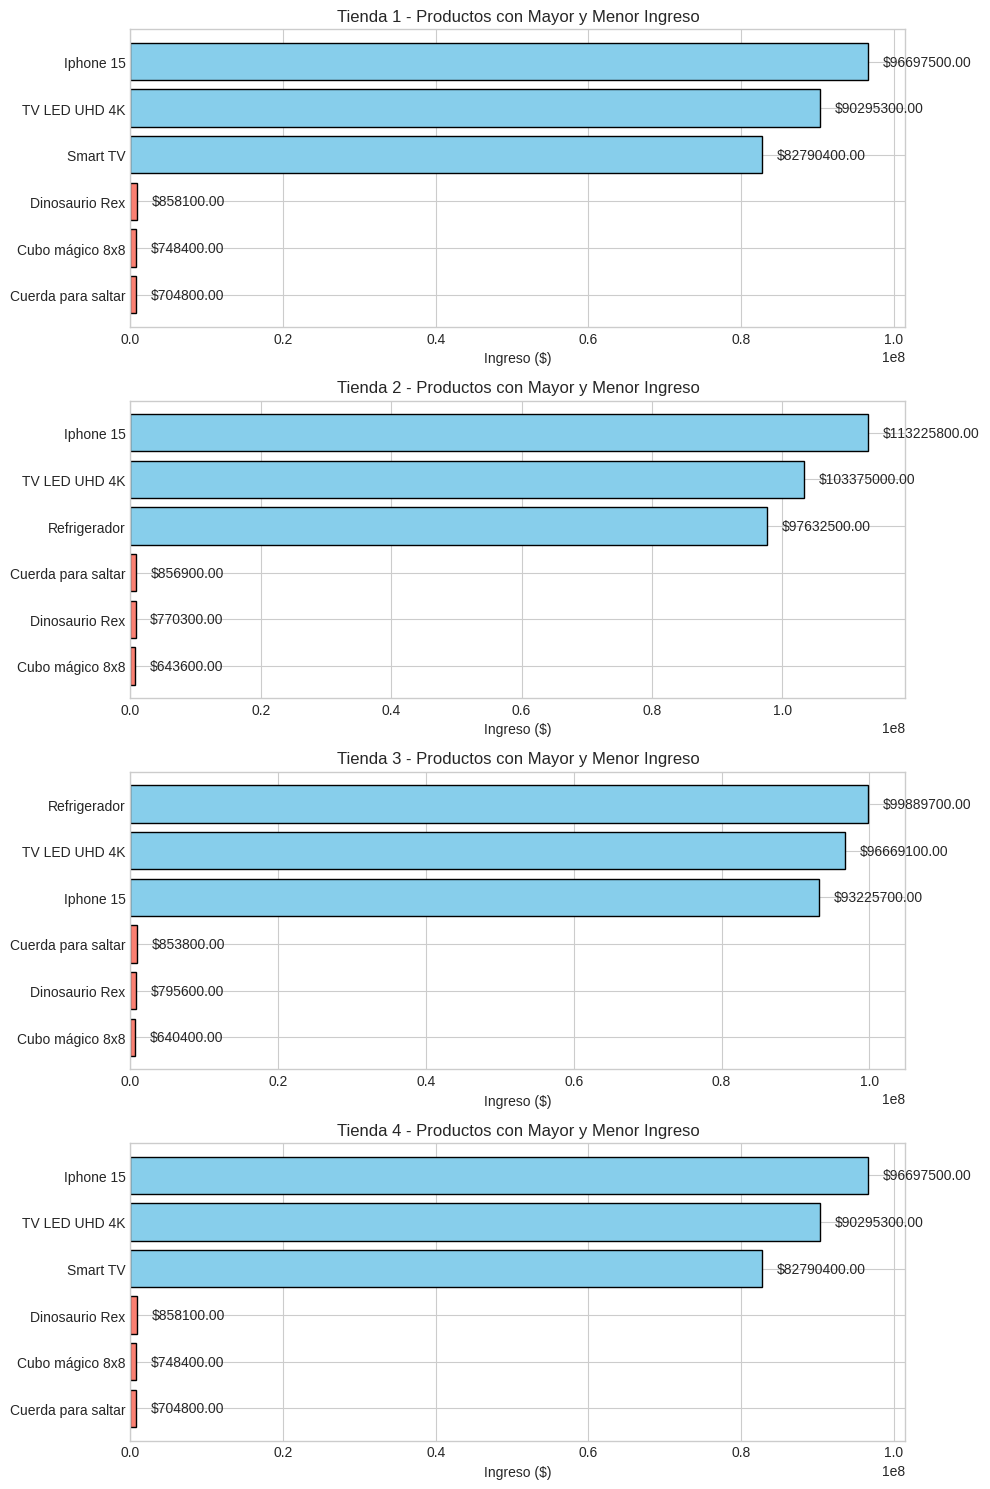

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

resultados_por_tienda = {}

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        ingreso_por_producto[producto] += precio

    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    resultados_por_tienda[f"Tienda {i}"] = {
        'mas_vendidos': top_mas_vendidos,
        'menos_vendidos': top_menos_vendidos
    }

    print(f"\nTienda {i} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {i} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

fig, axes = plt.subplots(4, 1, figsize=(10, 15))
axes = axes.flatten()

for i, (tienda_nombre, resultados) in enumerate(resultados_por_tienda.items()):
    mas_vendidos = resultados['mas_vendidos']
    menos_vendidos = resultados['menos_vendidos']

    productos_combinados = [item[0] for item in mas_vendidos] + [item[0] for item in menos_vendidos]
    ingresos_combinados = [item[1] for item in mas_vendidos] + [item[1] for item in menos_vendidos]

    ax = axes[i]
    bars = ax.barh(productos_combinados, ingresos_combinados, color=['skyblue']*3 + ['salmon']*3, edgecolor='black')
    ax.set_title(f'{tienda_nombre} - Productos con Mayor y Menor Ingreso')
    ax.set_xlabel('Ingreso ($)')
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + (0.02*max(ingresos_combinados)),
                bar.get_y() + bar.get_height()/2,
                f'${width:.2f}', va='center')

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

Tienda 1 - Costo de envío promedio: $23,459.46
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46


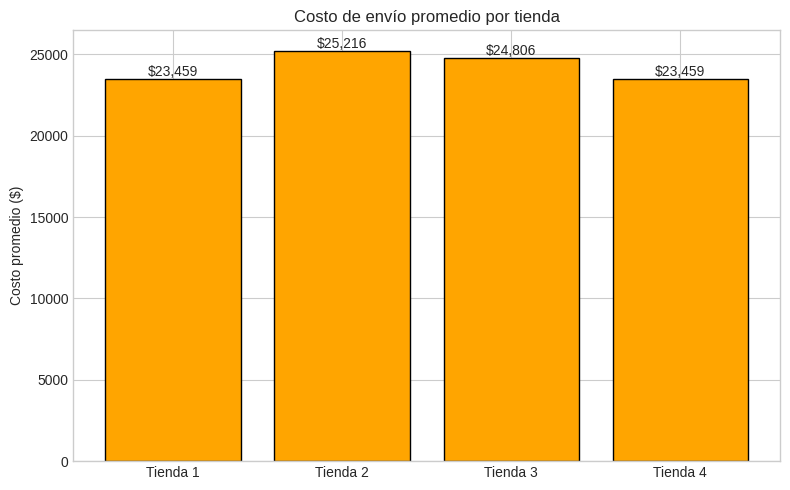

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

urls = [url, url2, url3, url4]

envio_promedio = []

for i, url in enumerate(urls):
    df = pd.read_csv(url)


    col_envio = [col for col in df.columns if 'envio' in col.lower() or 'envío' in col.lower()][0]

    promedio_envio = df[col_envio].mean()
    envio_promedio.append(promedio_envio)

    print(f"Tienda {i+1} - Costo de envío promedio: ${promedio_envio:,.2f}")


plt.figure(figsize=(8,5))
barras = plt.bar([f"Tienda {i+1}" for i in range(len(urls))], envio_promedio, color='orange', edgecolor='black')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xticks(rotation=0)


for barra, valor in zip(barras, envio_promedio):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f"${valor:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 6. Conclusión


In [30]:
 conclusion = """
Tras el análisis de los datos y la representación gráfica de ventas y calificaciones promedio por tienda, se concluye que la tienda 4 es la candidata más viable para cerrar.

En el gráfico de ventas totales, la tienda 4 presenta el nivel más bajo de ingresos acumulados, evidenciando un rendimiento comercial deficiente frente a las demás sucursales. Esto significa que aporta una porción mínima al total de ventas globales.

En el gráfico de calificaciones promedio por tienda, la tienda 4 también ocupa el último lugar, con una puntuación inferior al resto, lo que refleja menor satisfacción del cliente y posiblemente problemas de servicio, calidad o experiencia de compra.

La combinación de bajos ingresos y baja satisfacción sugiere que, aun con inversiones adicionales, la recuperación podría ser lenta y costosa. En cambio, reasignar recursos a las tiendas con mejores métricas permitiría optimizar la rentabilidad general del negocio.

Recomendación: cerrar la tienda 4 y enfocar estrategias de mejora y marketing en las sucursales con mayor potencial de crecimiento, tal como se evidencia en los gráficos de desempeño.
"""

print(conclusion)



Tras el análisis de los datos y la representación gráfica de ventas y calificaciones promedio por tienda, se concluye que la tienda 4 es la candidata más viable para cerrar.

En el gráfico de ventas totales, la tienda 4 presenta el nivel más bajo de ingresos acumulados, evidenciando un rendimiento comercial deficiente frente a las demás sucursales. Esto significa que aporta una porción mínima al total de ventas globales.

En el gráfico de calificaciones promedio por tienda, la tienda 4 también ocupa el último lugar, con una puntuación inferior al resto, lo que refleja menor satisfacción del cliente y posiblemente problemas de servicio, calidad o experiencia de compra.

La combinación de bajos ingresos y baja satisfacción sugiere que, aun con inversiones adicionales, la recuperación podría ser lenta y costosa. En cambio, reasignar recursos a las tiendas con mejores métricas permitiría optimizar la rentabilidad general del negocio.

Recomendación: cerrar la tienda 4 y enfocar estrategia